<a href="https://colab.research.google.com/github/syedahafsa135/Multiple_Disease_Prediction_System/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries and Dependencies

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# from zipfile import ZipFile

import numpy as np
import pandas as pd
import os
import builtins

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
!pip install streamlit-option-menu

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score



Zipping the files

In [7]:
# file_paths=[]
# for root,directories,files in os.walk('/content/drive/MyDrive/Should Zip'):
#   for file in files:
#     file_paths.append(os.path.join(root,file))
# with ZipFile('/content/drive/MyDrive/zip.zip','w') as zip:
#   for file in file_paths:
#     zip.write(file)

Data Collection and Processing

In [8]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/drive/MyDrive/Should Zip/heart_disease_data.csv')

In [9]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [12]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
#checking for unique values
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [15]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Data Preprocessing


In [17]:
# Rename Columns

heart_data.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure',
    'chol': 'Cholestrol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG',
    'thalach': 'Max Heart Rate',
    'exang': 'Exercise Induced Angina',
    'oldpeak': 'ST Depression(>6.2)',
    'slope': 'Slope of ST Segment',
    'ca': 'No of Major Vessels',
    'thal': 'Thalassemia',
    'target': 'Target'
}, inplace=True)

In [18]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest Pain Type          303 non-null    int64  
 3   Resting Blood Pressure   303 non-null    int64  
 4   Cholestrol               303 non-null    int64  
 5   Fasting Blood Sugar      303 non-null    int64  
 6   Resting ECG              303 non-null    int64  
 7   Max Heart Rate           303 non-null    int64  
 8   Exercise Induced Angina  303 non-null    int64  
 9   ST Depression(>6.2)      303 non-null    float64
 10  Slope of ST Segment      303 non-null    int64  
 11  No of Major Vessels      303 non-null    int64  
 12  Thalassemia              303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

Data Transformation

In [19]:
df = heart_data.copy()

In [20]:
# df.replace({'Sex': {0: 'Female', 1: 'Male'}}, inplace=True)

In [21]:
# df.replace({'Chest Pain Type': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'}}, inplace=True)

In [22]:
# df.replace({'Fasting Blood Sugar': {0: '> 120 mg/dl', 1: '<= 120 mg/dl'}}, inplace=True)

In [23]:
# df.replace({'Resting ECG': {0: 'Normal', 1: 'ST-T wave abnormality'}}, inplace=True)

In [24]:
# df.replace({'Excercise Induced Ingina':{0:'No', 1:'Yes'}},inplace=True)

In [25]:
# df.replace({'Slope of the ST Segment':{0:'Upsloping', 1:'Flat',2:'Downsloping'}},inplace=True)

In [26]:
# df.replace({'Thalassemia':{0:'Normal', 1:'Fixed Defect',2:'Reversible Defect'}},inplace=True)

In [27]:
# df.replace({'Target': {0: 'Clean', 1:'Disease'}}, inplace=True)

Data Visualization

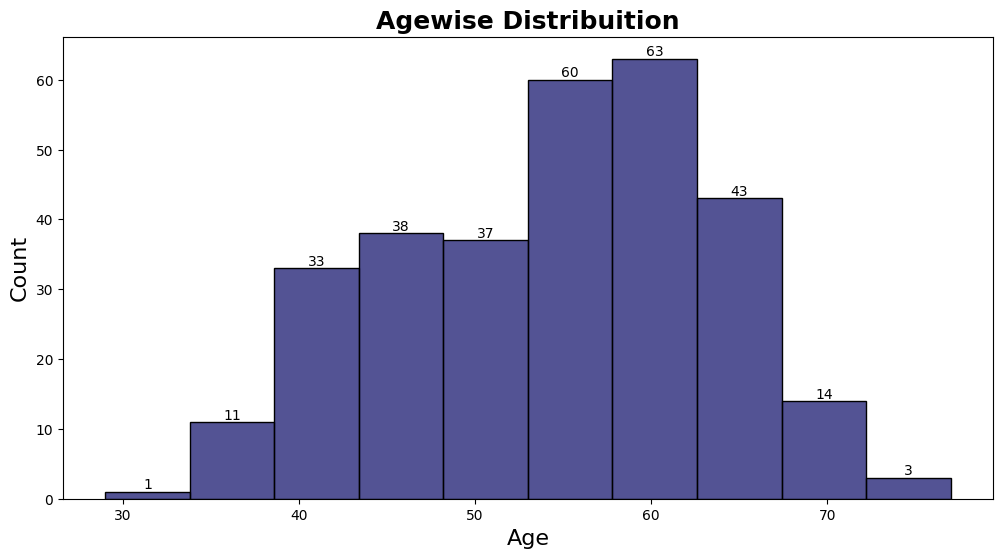

In [28]:
plt.figure(figsize=(12,6))
plt.title('Agewise Distribuition', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Age'], bins=10, color='midnightblue')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

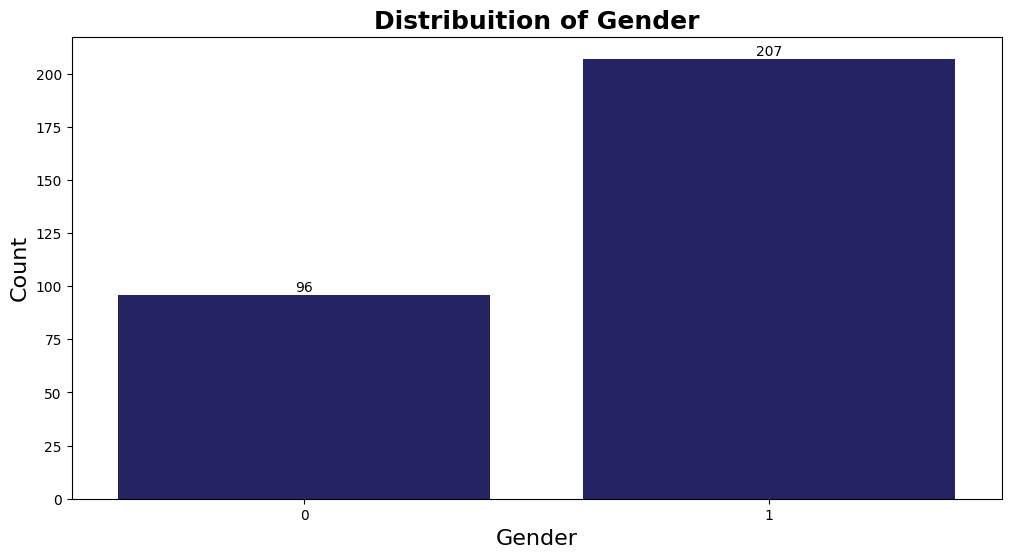

In [29]:
plt.figure(figsize=(12,6))
plt.title('Distribuition of Gender', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df['Sex'], color='midnightblue')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

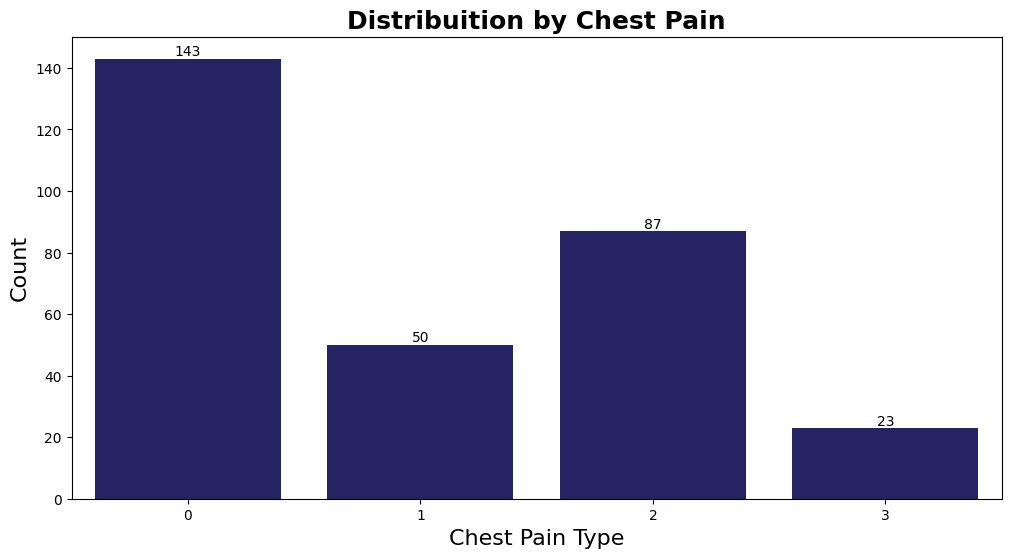

In [30]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Chest Pain', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Chest Pain Type'].value_counts().index, y=df['Chest Pain Type'].value_counts().values, color='midnightblue')
plt.xlabel('Chest Pain Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

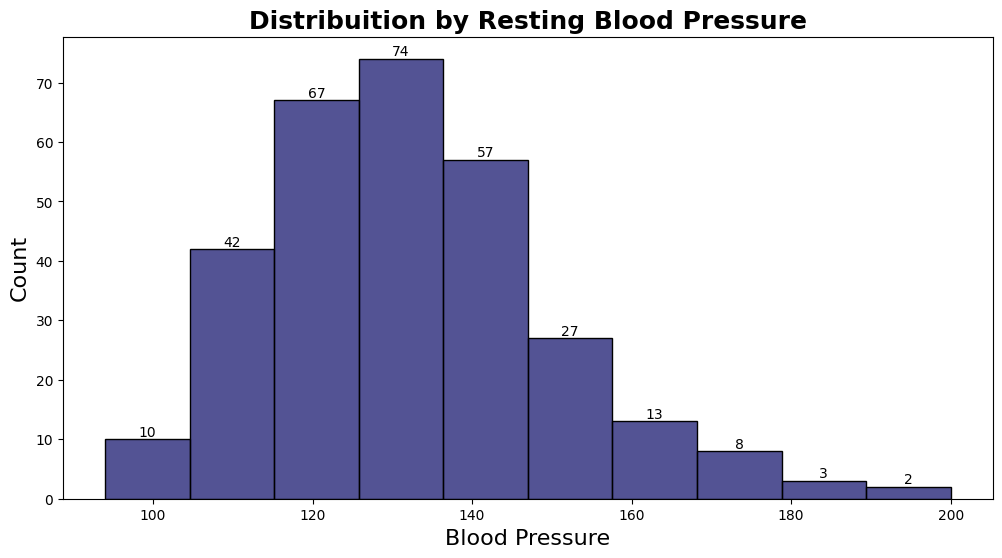

In [31]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Resting Blood Pressure', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Resting Blood Pressure'], bins=10, color='midnightblue')
plt.xlabel('Blood Pressure', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

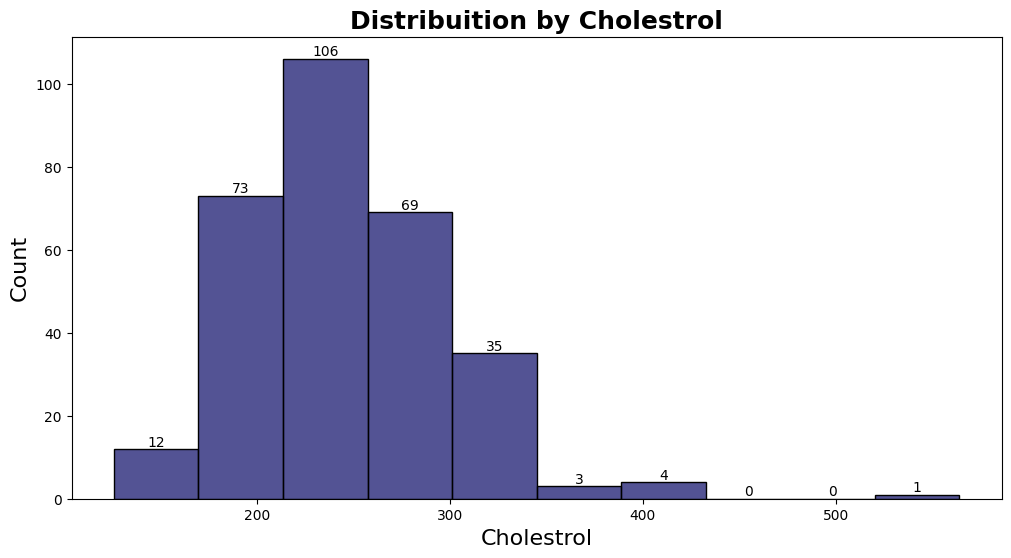

In [32]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Cholestrol', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Cholestrol'], bins=10, color='midnightblue')
plt.xlabel('Cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

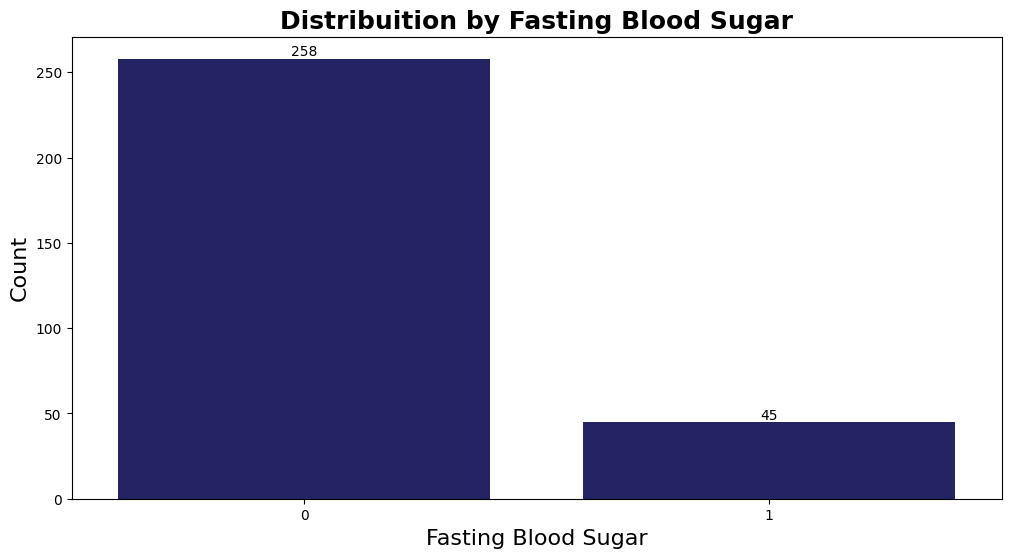

In [33]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Fasting Blood Sugar', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Fasting Blood Sugar'].value_counts().index, y=df['Fasting Blood Sugar'].value_counts().values, color='midnightblue')
plt.xlabel('Fasting Blood Sugar', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

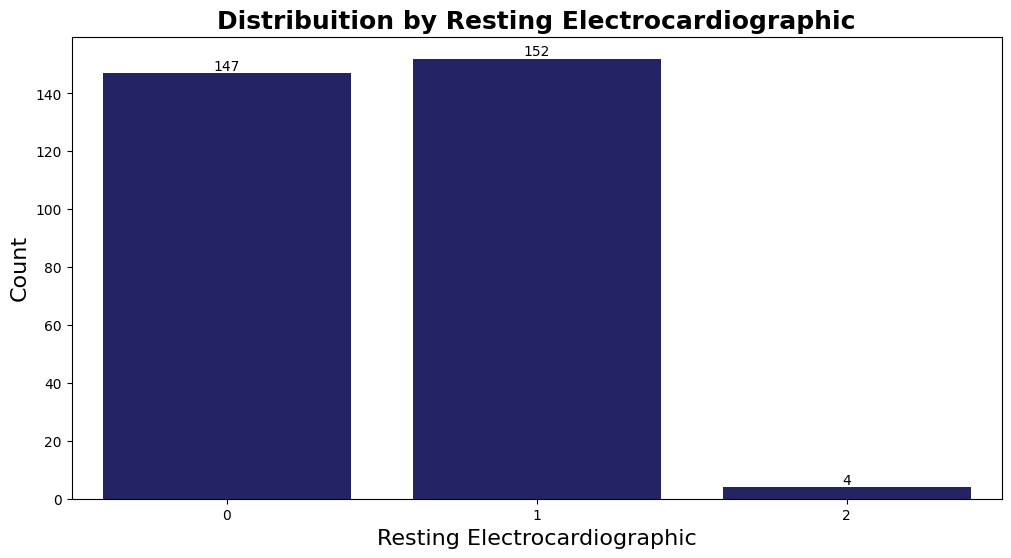

In [34]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Resting Electrocardiographic', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Resting ECG'].value_counts().index, y=df['Resting ECG'].value_counts().values, color='midnightblue')
plt.xlabel('Resting Electrocardiographic', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

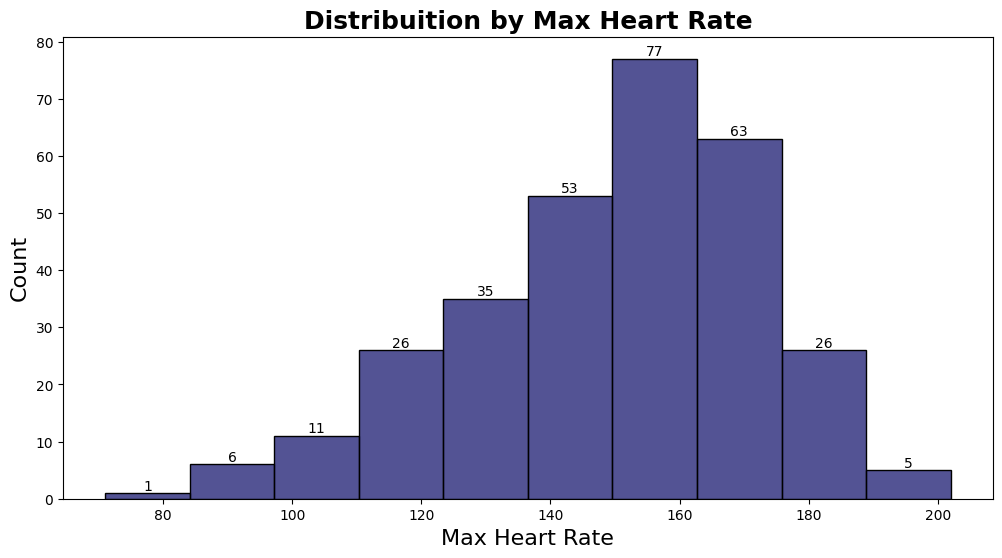

In [35]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Max Heart Rate', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Max Heart Rate'], bins=10, color='midnightblue')
plt.xlabel('Max Heart Rate', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

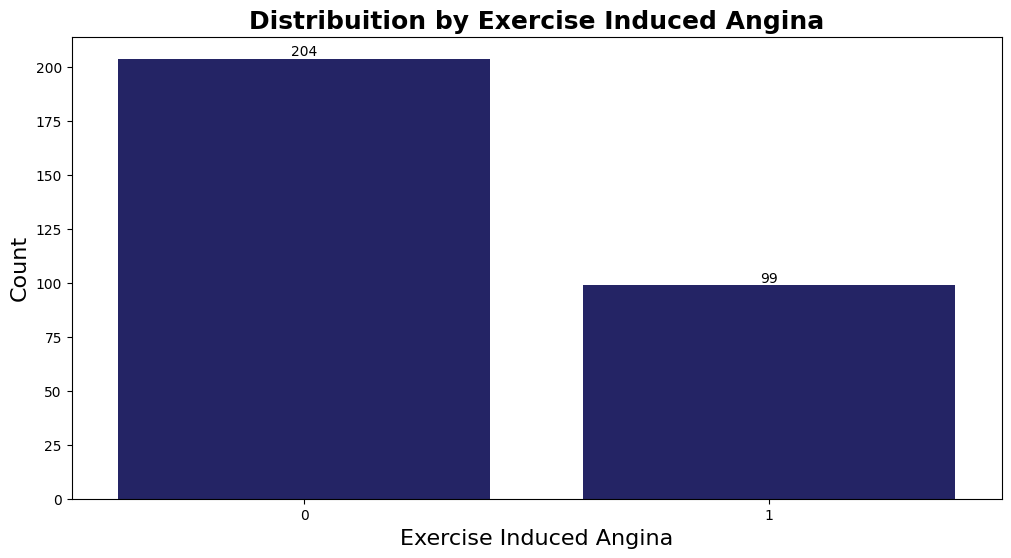

In [36]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Exercise Induced Angina', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Exercise Induced Angina'].value_counts().index, y=df['Exercise Induced Angina'].value_counts().values, color='midnightblue')
plt.xlabel('Exercise Induced Angina', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

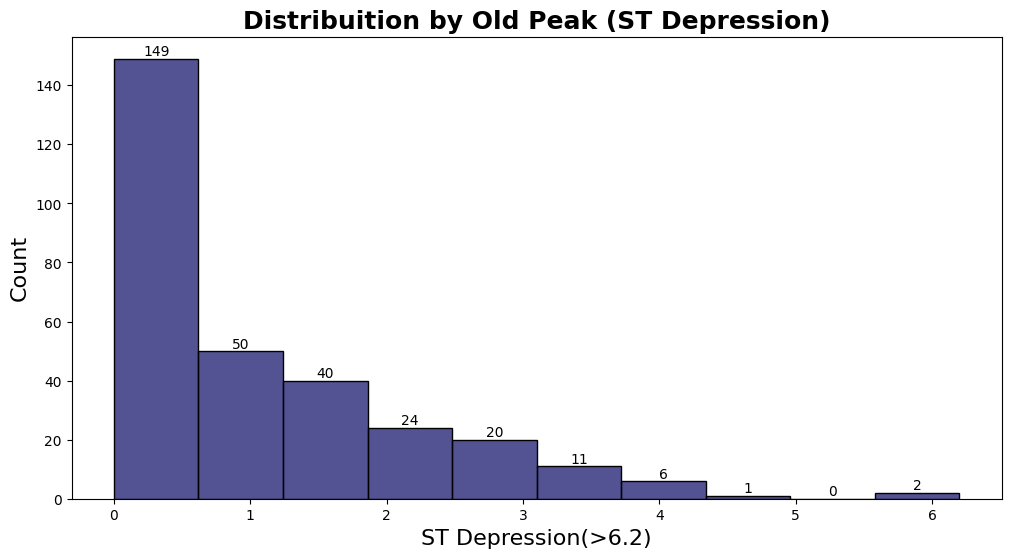

In [37]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Old Peak (ST Depression)', fontsize=18, fontweight='bold')
ax = sns.histplot(df['ST Depression(>6.2)'], bins=10, color='midnightblue')
plt.xlabel('ST Depression(>6.2)', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

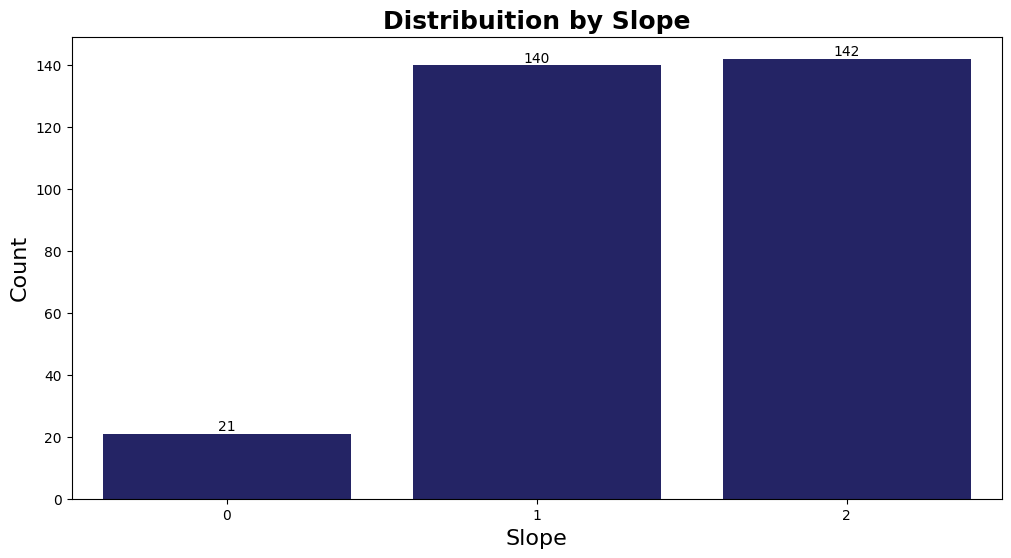

In [38]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Slope', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Slope of ST Segment'].value_counts().index, y=df['Slope of ST Segment'].value_counts().values, color='midnightblue')
plt.xlabel('Slope', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

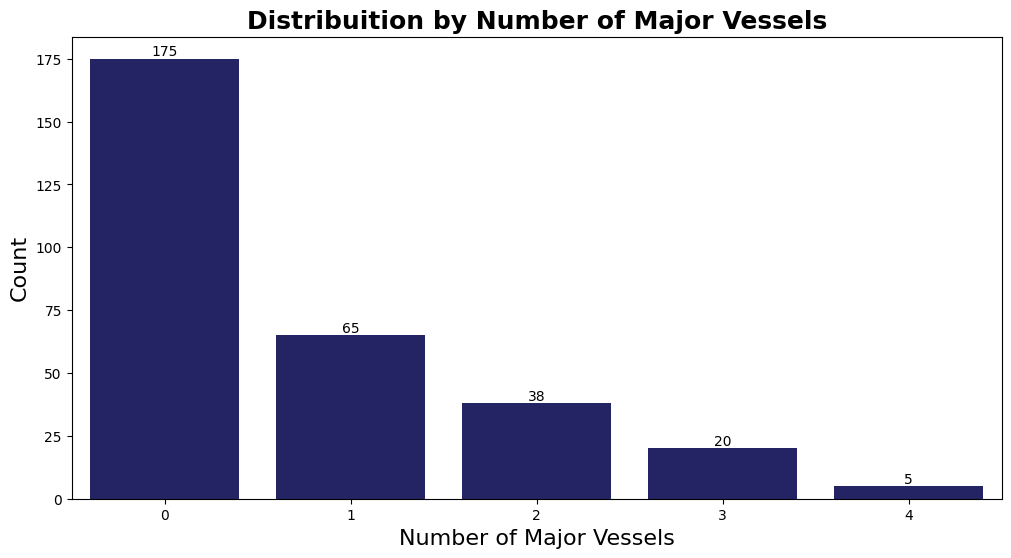

In [39]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Number of Major Vessels', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['No of Major Vessels'].value_counts().index, y=df['No of Major Vessels'].value_counts().values, color='midnightblue')
plt.xlabel('Number of Major Vessels', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

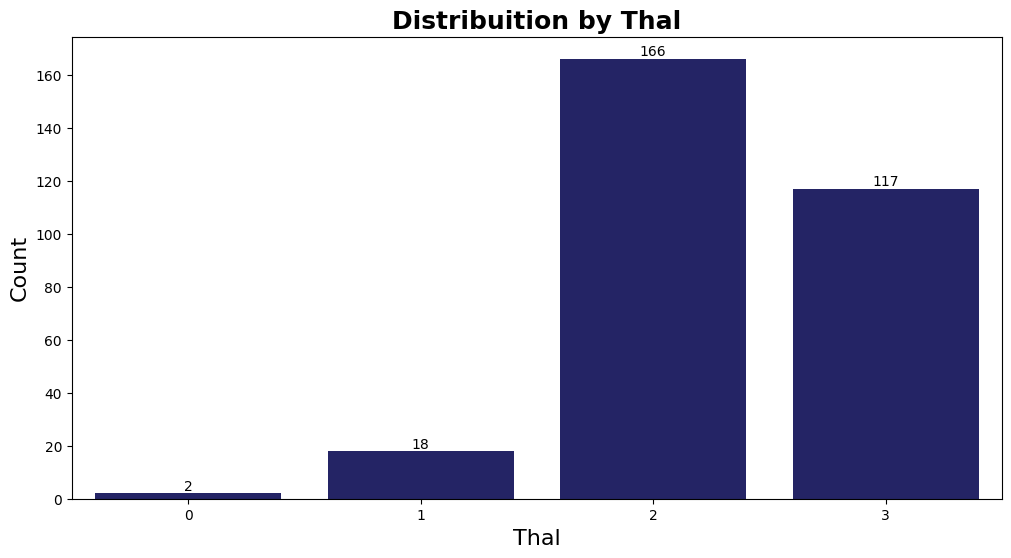

In [40]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Thal', fontsize=18, fontweight='bold')
ax = sns.barplot(x=df['Thalassemia'].value_counts().index, y=df['Thalassemia'].value_counts().values, color='midnightblue')
plt.xlabel('Thal', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

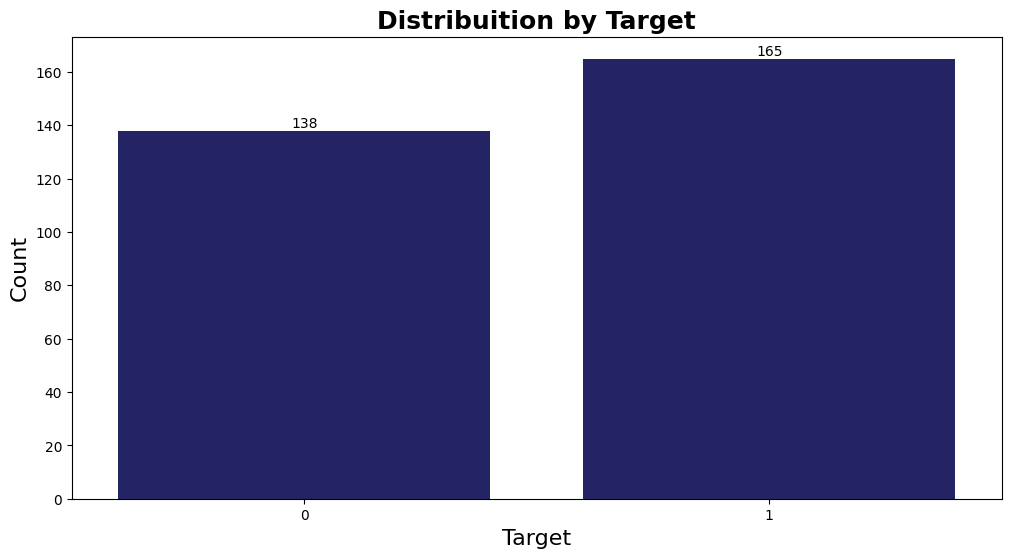

In [41]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Target', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df['Target'], color='midnightblue')
plt.xlabel('Target', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

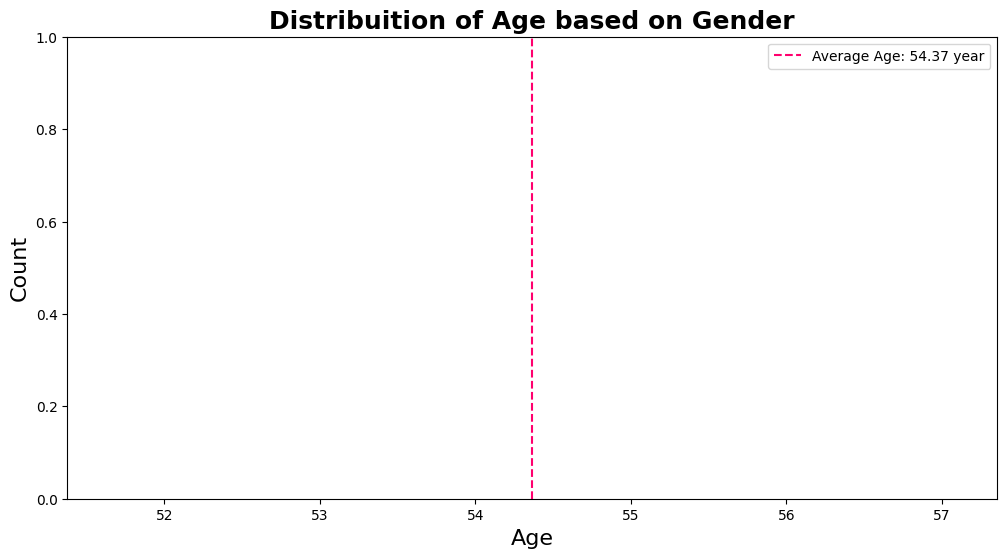

In [42]:

average_age = np.mean(df['Age'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Age based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['Sex']=='Male']['Age'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['Sex']=='Female']['Age'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_age, color='#ff006e', linestyle='--', label=f'Average Age: {average_age:.2f} year')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

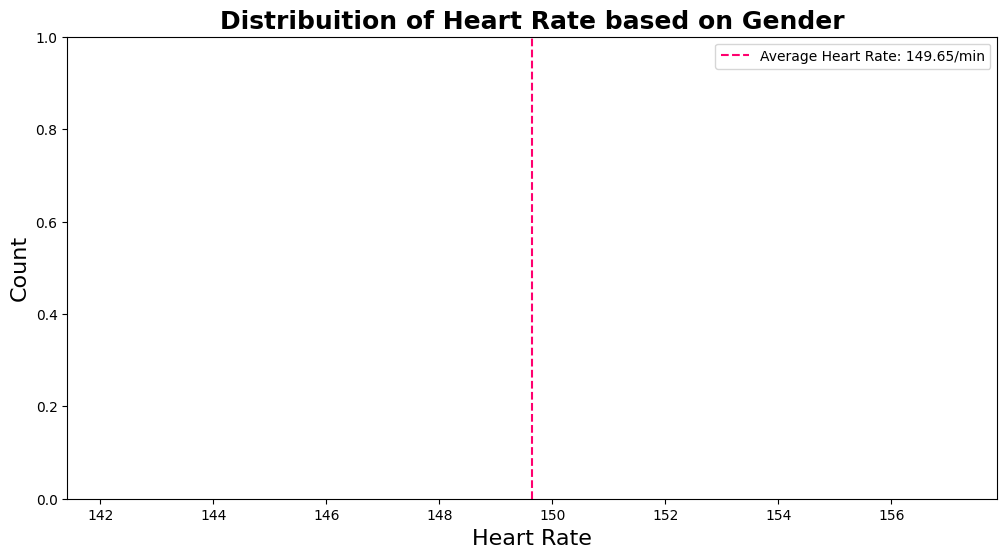

In [43]:
average_hr = np.mean(df['Max Heart Rate'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Heart Rate based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['Sex']=='Male']['Max Heart Rate'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['Sex']=='Female']['Max Heart Rate'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_hr, color='#ff006e', linestyle='--', label=f'Average Heart Rate: {average_hr:.2f}/min')
plt.xlabel('Heart Rate', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

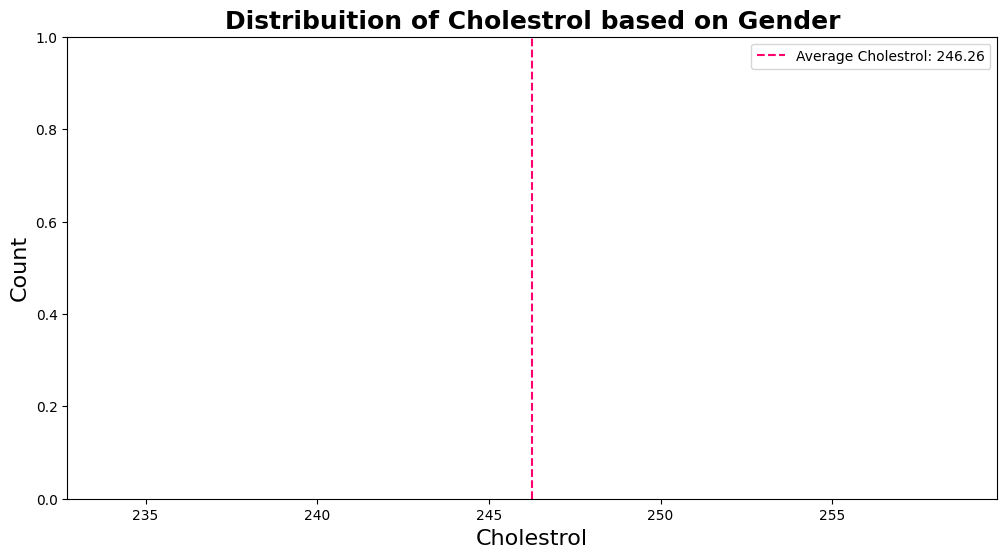

In [44]:
average_chol = np.mean(df['Cholestrol'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of Cholestrol based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['Sex']=='Male']['Cholestrol'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['Sex']=='Female']['Cholestrol'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_chol, color='#ff006e', linestyle='--', label=f'Average Cholestrol: {average_chol:.2f}')
plt.xlabel('Cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

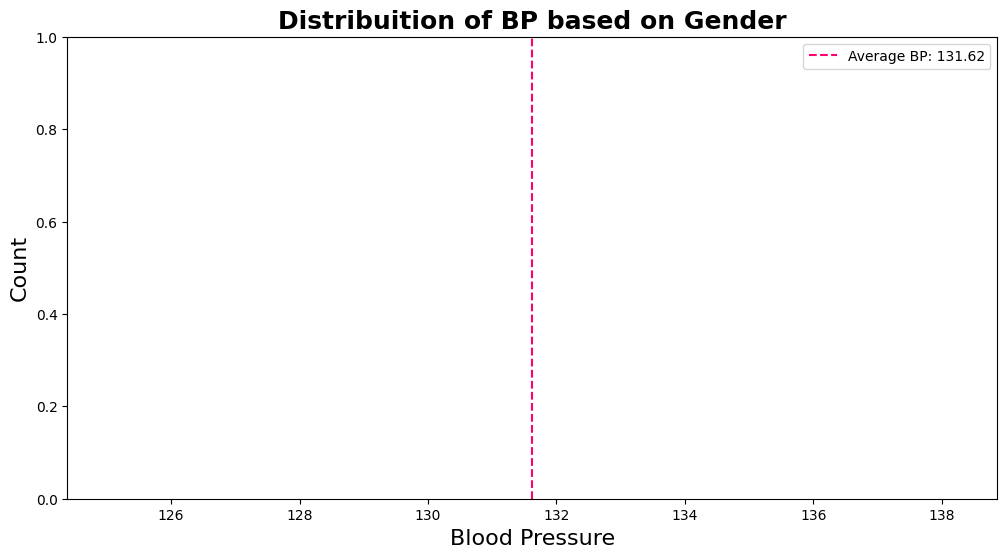

In [45]:
average_bp = np.mean(df['Resting Blood Pressure'])

plt.figure(figsize=(12,6))
plt.title('Distribuition of BP based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['Sex']=='Male']['Resting Blood Pressure'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['Sex']=='Female']['Resting Blood Pressure'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_bp, color='#ff006e', linestyle='--', label=f'Average BP: {average_bp:.2f}')
plt.xlabel('Blood Pressure', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

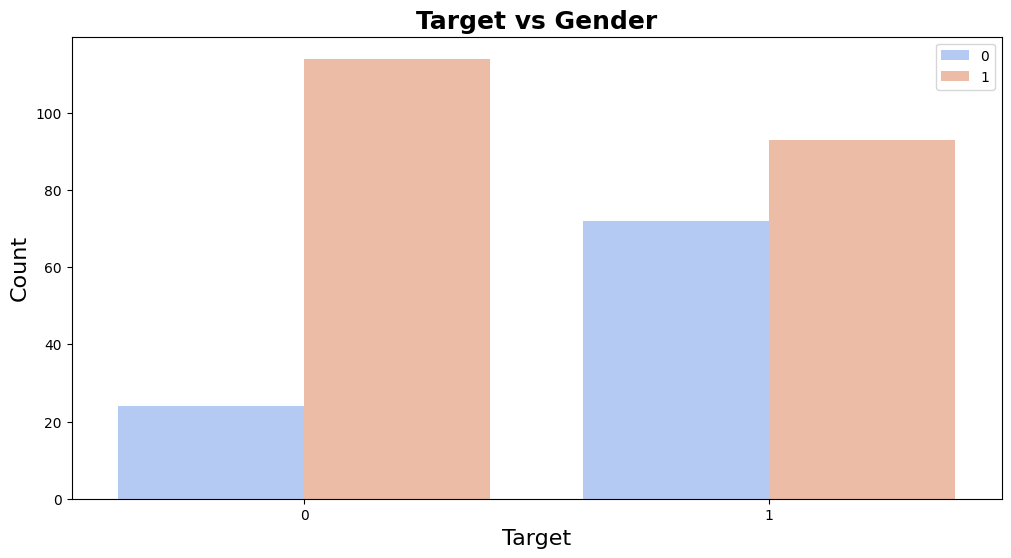

In [46]:
plt.figure(figsize=(12,6))
plt.title('Target vs Gender', fontsize=18, fontweight='bold')
sns.countplot(x=df['Target'], hue=df['Sex'], palette='coolwarm')
plt.xlabel('Target', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

<Axes: >

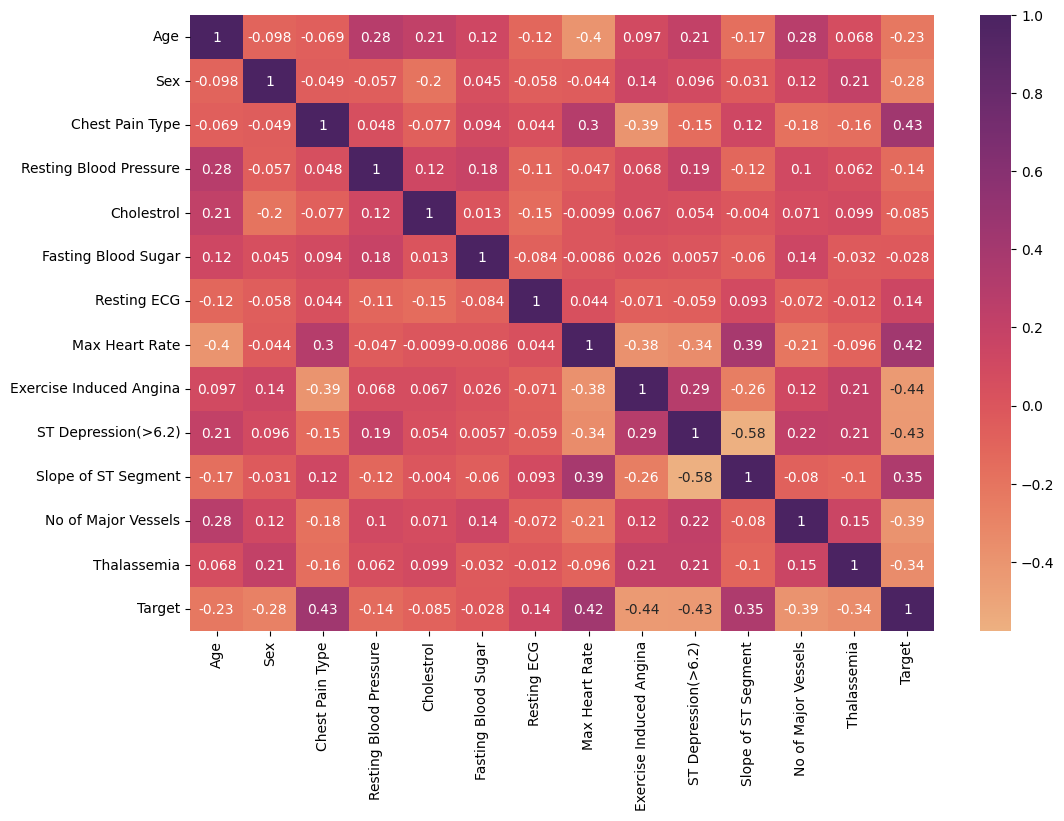

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(), square=False, cmap='flare', annot=True)


Machine Learning

Splitting the Features and Target

In [48]:
# Creating Features (X) and Target (y) variables
X = heart_data.drop(['Target'], axis=1)
y = heart_data['Target']

In [49]:
print(X)

     Age  Sex  Chest Pain Type  Resting Blood Pressure  Cholestrol  \
0     63    1                3                     145         233   
1     37    1                2                     130         250   
2     41    0                1                     130         204   
3     56    1                1                     120         236   
4     57    0                0                     120         354   
..   ...  ...              ...                     ...         ...   
298   57    0                0                     140         241   
299   45    1                3                     110         264   
300   68    1                0                     144         193   
301   57    1                0                     130         131   
302   57    0                1                     130         236   

     Fasting Blood Sugar  Resting ECG  Max Heart Rate  \
0                      1            0             150   
1                      0            1        

In [50]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: Target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [53]:
model = LogisticRegression()

In [54]:
# training the LogisticRegression model with Training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [55]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [56]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8553719008264463


Text(95.72222222222221, 0.5, 'Actual Value')

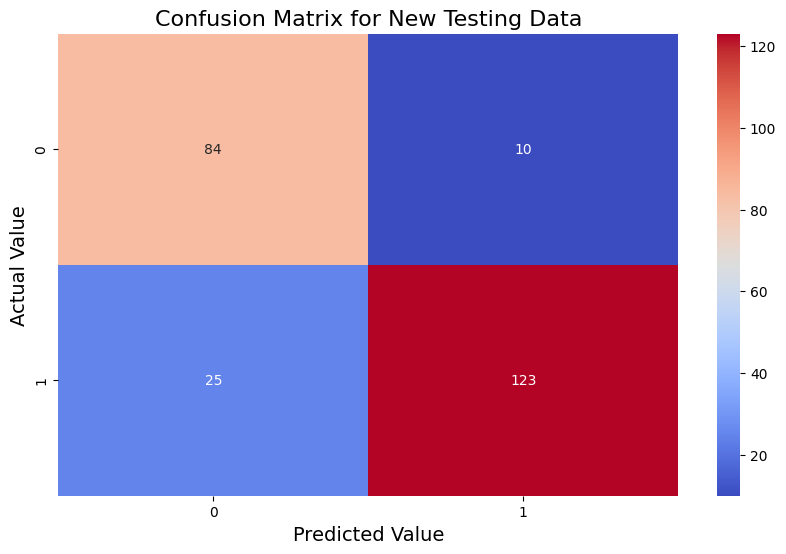

In [57]:
cm = confusion_matrix(X_train_prediction, y_train)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [58]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [59]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8852459016393442


Text(95.72222222222221, 0.5, 'Actual Value')

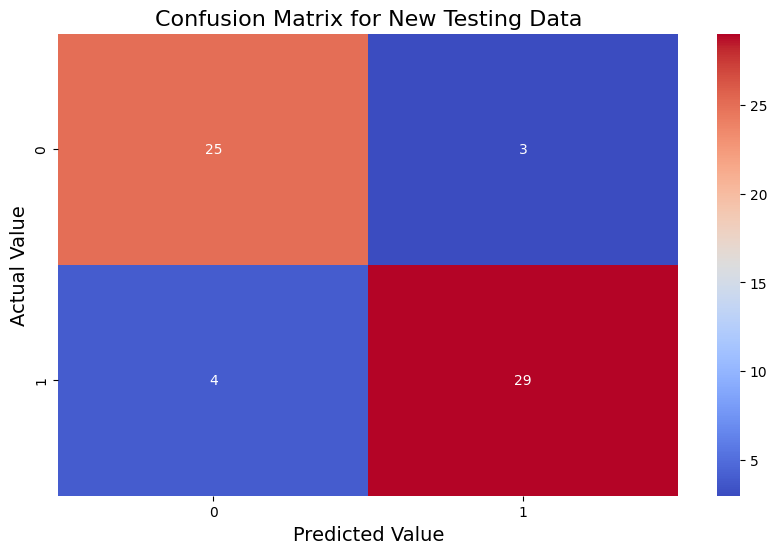

In [60]:
cm = confusion_matrix(X_test_prediction, y_test)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

In [61]:
# Precision, Recall, and F1 score on the training data
training_precision = precision_score(y_train, X_train_prediction)
training_recall = recall_score(y_train, X_train_prediction)
training_f1 = f1_score(y_train, X_train_prediction)

print('Precision score of the training data : ', training_precision)
print('Recall score of the training data : ', training_recall)
print('F1 score of the training data : ', training_f1)

# Precision, Recall, and F1 score on the test data
test_precision = precision_score(y_test, X_test_prediction)
test_recall = recall_score(y_test, X_test_prediction)
test_f1 = f1_score(y_test, X_test_prediction)

print('Precision score of the test data : ', test_precision)
print('Recall score of the test data : ', test_recall)
print('F1 score of the test data: ', test_f1)

Precision score of the training data :  0.831081081081081
Recall score of the training data :  0.924812030075188
F1 score of the training data :  0.8754448398576512
Precision score of the test data :  0.8787878787878788
Recall score of the test data :  0.90625
F1 score of the test data:  0.8923076923076922


**Logistic Regression without the python package**


Model Representation
Logistic regression models the probability
𝑃
(
𝑦
=
1
∣
𝑋
)
P(y=1∣X) that an instance
𝑋
X belongs to a particular class (usually denoted as 1).

The model is represented by the logistic (sigmoid) function applied to a linear combination of input features
𝑋
X:

𝑦
^
=
𝜎
(
𝑋
⋅
𝑤
+
𝑏
)
y
^
​
 =σ(X⋅w+b)

Sigmoid Function
The sigmoid function maps any real-valued number into the range (0, 1), which makes it suitable for representing probabilities. It has an S-shaped curve:

𝜎
(
𝑧
)
=
1/1+e^-z


z=X⋅w+b


Cost Function:

The cost function for logistic regression is the log loss or binary cross-entropy loss, which measures the performance of the model:
𝐽
(
𝑤
)
=
−
1/
𝑚
∑
𝑖
=
1
𝑚
[
𝑦
𝑖
log
⁡
(
𝑦
^
𝑖
)
+
(
1
−
𝑦
𝑖
)
log
⁡
(
1
−
𝑦
^
𝑖
)
]

Where
𝑚
is the number of samples,
𝑦
is the actual label, and
𝑦
^i
​is the predicted probability.

Gradient Descent:

We need to update the weights
𝑤
to minimize the cost function using gradient descent:
𝑤
:
=
𝑤
−
𝛼
∇
𝐽
(
𝑤
)
w:=w−α∇J(w)
Where
𝛼
α is the learning rate, and
∇
𝐽
(
𝑤
)
 is the gradient of the cost function with respect to
𝑤
.
The gradient is calculated as:
∇J(w)=
1/m
​
( X^
T)
 (
y
^
​
 −y)

In [62]:
def sigmoid(X, weight):
  z= np.dot(X, weight)
  return 1/(1 + np.exp(-z))


def loss(sig, y):
  return (-y * np.log(sig) - (1 - y) * np.log(1- sig)).mean()


def gradient_descent_logistic(X, sig, y):
  return np.dot(X.T, (sig - y))/y.shape[0]

def update_weight(weight, gradient, alpha):
  return weight - alpha * gradient

num_iteration= 1000000
intercept= np.ones((X.shape[0], 1))
X= np.concatenate((intercept, X), axis= 1)
theta= np.zeros(X.shape[1])
print(theta.shape)
alpha= 0.01
for i in range(num_iteration):
  sig= sigmoid(X, theta)
  gradient= gradient_descent_logistic(X, sig, y)
  theta= update_weight(theta, gradient, alpha)


print(X.shape)
print(y.shape)
print(theta.shape)

result= sigmoid(X, theta)



y_predwpp= []
for i in result:
  binary_predictions = (i >= 0.5).astype(int)
  y_predwpp.append(binary_predictions)

y_predwpp= np.array(y_predwpp)
y_predwpp


(14,)


<ipython-input-62-1de116e5f0c5>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


(303, 14)
(303,)
(14,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

In [63]:


# Ensure y_testwpp and y_predwpp are numpy arrays
y_testwpp = np.array(y)
y_predwpp = np.array(y_predwpp)

# Initialize confusion matrix components
TP = FP = TN = FN = 0

# Use the built-in zip function
for yt, yp in builtins.zip(y_testwpp, y_predwpp):
    if yt == 1 and yp == 1:
        TP += 1  # True Positive: Both actual and predicted are 1
    elif yt == 0 and yp == 1:
        FP += 1  # False Positive: Actual is 0 but predicted is 1
    elif yt == 0 and yp == 0:
        TN += 1  # True Negative: Both actual and predicted are 0
    elif yt == 1 and yp == 0:
        FN += 1  # False Negative: Actual is 1 but predicted is 0

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.77


Building a Predictive System

In [64]:
import pickle


filename = 'heart_disease_model(1).sav'
pickle.dump(model, open(filename, 'wb'))


# loading the saved model
loaded_model = pickle.load(open('heart_disease_model(1).sav', 'rb'))

